In [61]:
# Import necessary libraries
import numpy as np
import pandas as pd
import ast
from collections import OrderedDict
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
# Read in CSV
df = pd.read_csv("talks_info.csv")

In [63]:
# Display first few rows to view data
df.head()

,_id,duration,event,likes,page_url,published_date,recorded_date,related_videos,speakers,subtitle_languages,summary,title,topics,transcript,views,youtube_video_code
0,21,992,TED2006,17K,https://www.ted.com/talks/mena_trott_meet_the_...,2006-08-25T00:11:00Z,2006-02-23,"[""144"",""1282"",""1379"",""87"",""2302"",""2638""]","[{""name"":""Mena Trott"",""occupation"":""Blogger; c...","[{""name"":""English"",""code"":""en""},{""name"":""Vietn...","The founding mother of the blog revolution, Mo...",Meet the founder of the blog revolution,"[{""id"":""4"",""name"":""culture""},{""id"":""13"",""name""...","Over the past couple of days, as I've been pre...",589115,RlBTxuWCuL8
1,1,957,TED2006,110K,https://www.ted.com/talks/al_gore_averting_the...,2006-06-27T00:11:00Z,2006-02-25,"[""243"",""547"",""2093"",""74405"",""64693"",""83767""]","[{""name"":""Al Gore"",""occupation"":""Climate advoc...","[{""name"":""Greek"",""code"":""el""},{""name"":""Gujarat...",With the same humor and humanity he exuded in ...,Averting the climate crisis,"[{""id"":""3"",""name"":""climate change""},{""id"":""4"",...","Thank you so much, Chris. And it's truly a gre...",3671801,rDiGYuQicpA
2,7,1266,TED2006,60K,https://www.ted.com/talks/david_pogue_simplici...,2006-06-27T00:11:00Z,2006-02-24,"[""1725"",""2274"",""172"",""2664"",""2464"",""1268""]","[{""name"":""David Pogue"",""occupation"":""Technolog...","[{""name"":""Greek"",""code"":""el""},{""name"":""English...",New York Times columnist David Pogue takes aim...,Simplicity sells,"[{""id"":""10"",""name"":""technology""},{""id"":""36"",""n...","(Music: ""The Sound of Silence,"" Simon &amp; Ga...",2008487,NEjZt0y6OOw
3,47,1126,TEDGlobal 2005,80K,https://www.ted.com/talks/david_deutsch_chemic...,2006-09-12T00:11:00Z,2005-07-14,"[""2237"",""701"",""1095"",""1386"",""76211"",""242""]","[{""name"":""David Deutsch"",""occupation"":""Physici...","[{""name"":""Greek"",""code"":""el""},{""name"":""English...",Legendary scientist David Deutsch puts theoret...,Chemical scum that dream of distant quasars,"[{""id"":""3"",""name"":""climate change""},{""id"":""4"",...",We've been told to go out on a limb and say so...,2694257,gQliI_WGaGk
4,55,1524,TED2006,14K,https://www.ted.com/talks/jehane_noujaim_my_wi...,2006-07-25T00:11:00Z,2006-02-26,"[""2228"",""1476"",""800"",""2890"",""45233"",""2694""]","[{""name"":""Jehane Noujaim"",""occupation"":""Filmma...","[{""name"":""English"",""code"":""en""},{""name"":""Vietn...",Jehane Noujaim unveils her 2006 TED Prize wish...,My wish: A global day of film,"[{""id"":""4"",""name"":""culture""},{""id"":""6"",""name"":...",I can't help but this wish: to think about whe...,489757,QCFSrb6B5nw


In [64]:
# Data summary
# Get a summary of dataset to better understand distribution and statistics of numerical columns
df.describe()

,_id,duration,views
count,5631.00,5631.00,5631.00
mean,25686.57,707.69,2130394.21
std,29649.01,521.18,3679481.02
min,1.00,60.00,587.00
25%,1642.50,355.00,678154.00
50%,9807.00,682.00,1392074.00
75%,50009.50,926.50,2182299.50
max,95714.00,20404.00,73389142.00


In [65]:
# Looks like some of our columns aren't being read as integers, let's fix that

# convert string representation of numbers in the thousands to numeric values
def likes_to_numeric(likes_str):
    # check if the string ends with 'K' to indicate thousands
    if likes_str.endswith('K'):
        # extract the numeric part of the string and convert it to an integer
        return int(float(likes_str[:-1]) * 1000)
    # check if string ends with 'M' to indicate millions
    elif likes_str.endswith('M'):
        return int(float(likes_str[:-1]) * 1000000)
    else:
        # if the string does not end with 'k', convert it to an integer directly
        return int(likes_str)

# apply function to the 'likes' column
df['likes'] = df['likes'].apply(likes_to_numeric)
# convert views to numeric
df['views'] = df['views'].astype(int)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# let's view the summary again
df.describe()

,_id,duration,likes,views
count,5631.00,5631.00,5631.00,5631.00
mean,25686.57,707.69,63362.76,2130394.21
std,29649.01,521.18,108900.28,3679481.02
min,1.00,60.00,17.00,587.00
25%,1642.50,355.00,20000.00,678154.00
50%,9807.00,682.00,41000.00,1392074.00
75%,50009.50,926.50,65000.00,2182299.50
max,95714.00,20404.00,2200000.00,73389142.00


In [66]:
#  Now I want to be able to use the values in speakers, subtitle languages, and topics, so let's change those dictionaries into lists
df['speakers'] = df['speakers'].apply(ast.literal_eval)
# edit topics column to make a list of topics instead of a dictionary of topics
df['speakers_list'] = df['speakers'].apply(lambda x: [topic['name'] for topic in x])

df['subtitle_languages'] = df['subtitle_languages'].apply(ast.literal_eval)
# edit topics column to make a list of topics instead of a dictionary of topics
df['sl_list'] = df['subtitle_languages'].apply(lambda x: [topic['name'] for topic in x])

df['topics'] = df['topics'].apply(ast.literal_eval)
# edit topics column to make a list of topics instead of a dictionary of topics
df['topics_list'] = df['topics'].apply(lambda x: [topic['name'] for topic in x])

# Let's view the dataset again
df.head()

,_id,duration,event,likes,page_url,published_date,recorded_date,related_videos,speakers,subtitle_languages,summary,title,topics,transcript,views,youtube_video_code,speakers_list,sl_list,topics_list
0,21,992,TED2006,17000,https://www.ted.com/talks/mena_trott_meet_the_...,2006-08-25T00:11:00Z,2006-02-23,"[""144"",""1282"",""1379"",""87"",""2302"",""2638""]","[{'name': 'Mena Trott', 'occupation': 'Blogger...","[{'name': 'English', 'code': 'en'}, {'name': '...","The founding mother of the blog revolution, Mo...",Meet the founder of the blog revolution,"[{'id': '4', 'name': 'culture'}, {'id': '13', ...","Over the past couple of days, as I've been pre...",589115,RlBTxuWCuL8,[Mena Trott],"[English, Vietnamese, Italian, Arabic, Portugu...","[culture, design, business, entertainment, sof..."
1,1,957,TED2006,110000,https://www.ted.com/talks/al_gore_averting_the...,2006-06-27T00:11:00Z,2006-02-25,"[""243"",""547"",""2093"",""74405"",""64693"",""83767""]","[{'name': 'Al Gore', 'occupation': 'Climate ad...","[{'name': 'Greek', 'code': 'el'}, {'name': 'Gu...",With the same humor and humanity he exuded in ...,Averting the climate crisis,"[{'id': '3', 'name': 'climate change'}, {'id':...","Thank you so much, Chris. And it's truly a gre...",3671801,rDiGYuQicpA,[Al Gore],"[Greek, Gujarati, English, Italian, Swedish, C...","[climate change, culture, environment, global ..."
2,7,1266,TED2006,60000,https://www.ted.com/talks/david_pogue_simplici...,2006-06-27T00:11:00Z,2006-02-24,"[""1725"",""2274"",""172"",""2664"",""2464"",""1268""]","[{'name': 'David Pogue', 'occupation': 'Techno...","[{'name': 'Greek', 'code': 'el'}, {'name': 'En...",New York Times columnist David Pogue takes aim...,Simplicity sells,"[{'id': '10', 'name': 'technology'}, {'id': '3...","(Music: ""The Sound of Silence,"" Simon &amp; Ga...",2008487,NEjZt0y6OOw,[David Pogue],"[Greek, English, Vietnamese, Italian, Arabic, ...","[technology, computers, entertainment, media, ..."
3,47,1126,TEDGlobal 2005,80000,https://www.ted.com/talks/david_deutsch_chemic...,2006-09-12T00:11:00Z,2005-07-14,"[""2237"",""701"",""1095"",""1386"",""76211"",""242""]","[{'name': 'David Deutsch', 'occupation': 'Phys...","[{'name': 'Greek', 'code': 'el'}, {'name': 'En...",Legendary scientist David Deutsch puts theoret...,Chemical scum that dream of distant quasars,"[{'id': '3', 'name': 'climate change'}, {'id':...",We've been told to go out on a limb and say so...,2694257,gQliI_WGaGk,[David Deutsch],"[Greek, English, Vietnamese, Italian, Arabic, ...","[climate change, culture, environment, global ..."
4,55,1524,TED2006,14000,https://www.ted.com/talks/jehane_noujaim_my_wi...,2006-07-25T00:11:00Z,2006-02-26,"[""2228"",""1476"",""800"",""2890"",""45233"",""2694""]","[{'name': 'Jehane Noujaim', 'occupation': 'Fil...","[{'name': 'English', 'code': 'en'}, {'name': '...",Jehane Noujaim unveils her 2006 TED Prize wish...,My wish: A global day of film,"[{'id': '4', 'name': 'culture'}, {'id': '6', '...",I can't help but this wish: to think about whe...,489757,QCFSrb6B5nw,[Jehane Noujaim],"[English, Vietnamese, Italian, Arabic, Portugu...","[culture, global issues, entertainment, social..."


In [7]:
# Check for missing values
print(df.isnull().sum())

_id                     0
duration                0
event                   1
likes                   0
page_url                0
published_date          0
recorded_date           2
related_videos          0
speakers                0
subtitle_languages      0
summary                 0
title                   0
topics                  0
transcript            648
views                   0
youtube_video_code    169
speakers_list           0
sl_list                 0
topics_list             0
dtype: int64


In [ ]:
# Distribution of numerical features
# Visualize the distribution of numberical features such as duration, likes, and views

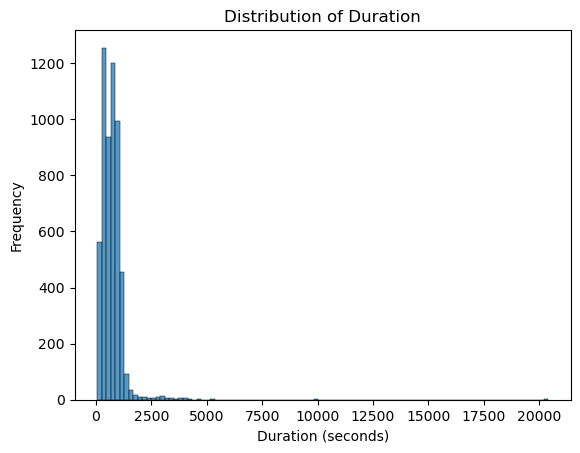

In [25]:
# distribution of duration
sns.histplot(df['duration'], bins=100)
plt.title('Distribution of Duration')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

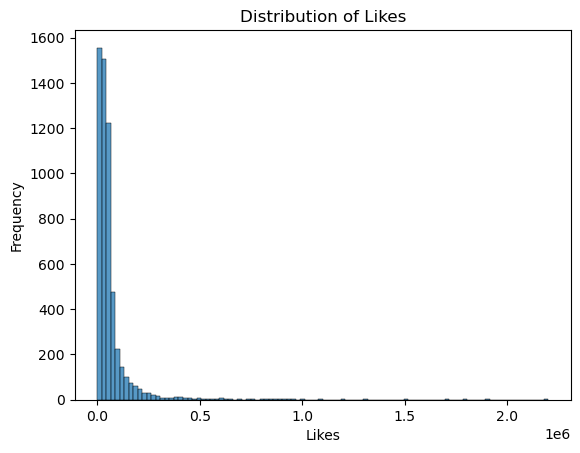

In [26]:
# Distribution of 'likes'
sns.histplot(df['likes'], bins=100)
plt.title('Distribution of Likes')
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.show()

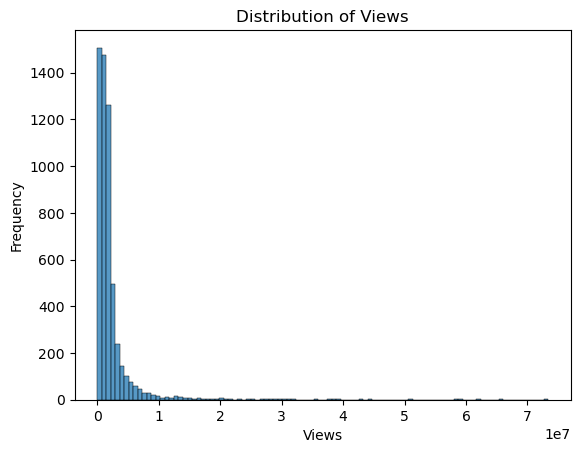

In [27]:
# Distribution of 'views'
sns.histplot(df['views'], bins=100)
plt.title('Distribution of Views')
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.show()

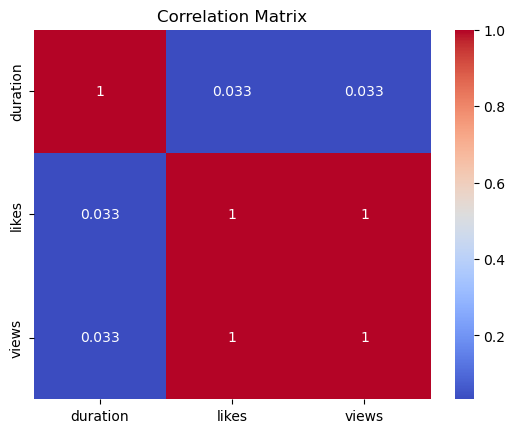

In [17]:
# Check correlation bw duration, likes, and views

correlation = df[['duration', 'likes', 'views']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

speakers_list
[Alex Gendler]        48
[Iseult Gillespie]    35
[Matt Walker]         17
[Alex Rosenthal]      16
[]                    14
[Elizabeth Cox]       14
[Emma Bryce]          13
[Daniel Finkel]       12
[Juan Enriquez]       11
[Adam Grant]          10
Name: count, dtype: int64
topics_list
science          1267
technology       1231
TED-Ed            878
culture           828
animation         805
education         772
society           710
TEDx              700
social change     675
global issues     670
Name: count, dtype: int64


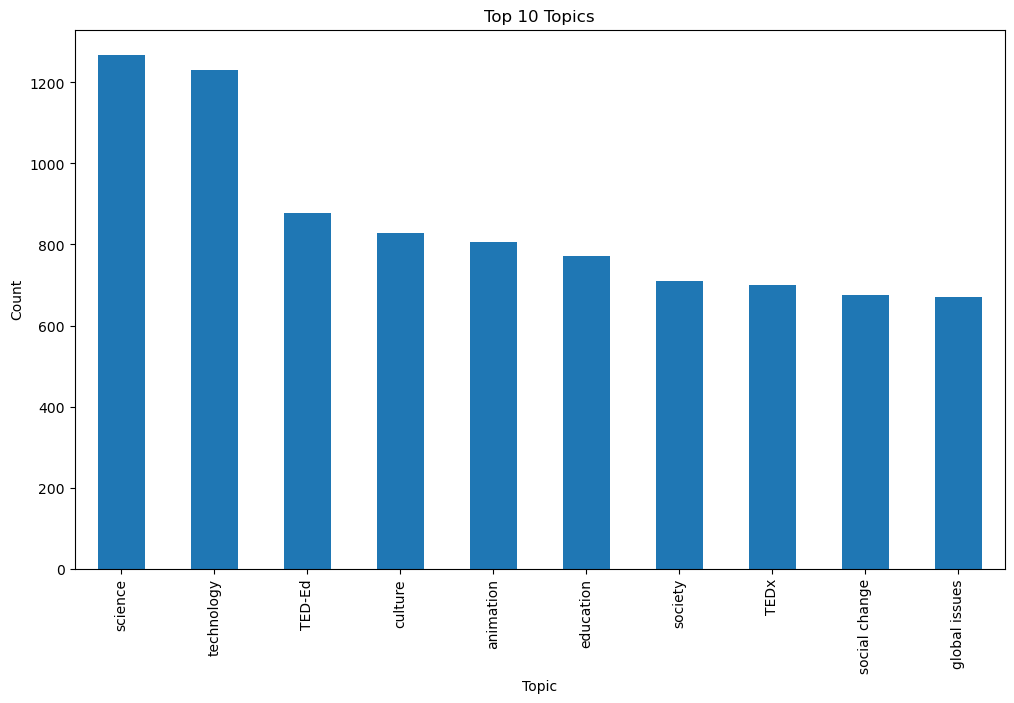

In [19]:
# Identify top speakers and topics
# Top 10 speakers
top_speakers = df['speakers_list'].value_counts().head(10)
print(top_speakers)

# Top 10 topics
top_topics = df['topics_list'].explode().value_counts().head(10)
print(top_topics)

# Visualize top topics
#plt.figure(figsize=(12, 7))
top_topics.plot(kind='bar')
plt.title('Top 10 Topics')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()

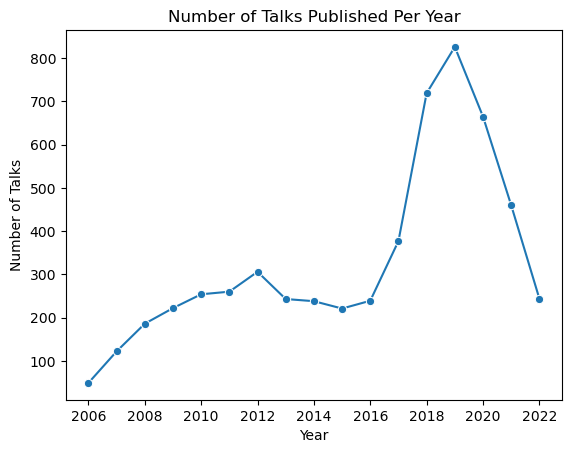

In [68]:
# Time series analysis
# Convert to datetime
df['published_date'] = pd.to_datetime(df['published_date'])
df['recorded_date'] = pd.to_datetime(df['recorded_date'])

# Distribution of talks by published date
df['published_year'] = df['published_date'].dt.year
talks_by_year = df['published_year'].value_counts().sort_index()

#plt.figure(figsize=(12, 7))
sns.lineplot(data=talks_by_year, marker='o')
plt.title('Number of Talks Published Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Talks')
plt.show()